## Week two machine learning 
This notebook cover basic fundamental of regression

### load all the library (packages) needed for the project

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Get the house data for the analysis

In [74]:
#! wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [75]:
! ls

housing.csv  weekTwoNotebook.ipynb


### Load (read in) the data using pandas

In [76]:
housing_df = pd.read_csv("housing.csv")

### Exploratory data analysis

In [77]:
## use head to examine the first 5 rows of the datasets
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [78]:
## Check the data type for each column
housing_df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [79]:
## Check if there any NAs in the datasets 
housing_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Visualise all the columns to see their destributions

/var/folders/js/95x7pm0d46d9qsgdhmvy56400000gn/T/ipykernel_67300/182762179.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  housing_df.hist(bins=100, ax=ax, layout=(3, 3), column=['housing_median_age', 'total_rooms','total_bedrooms','population','households','median_income','median_house_value'])


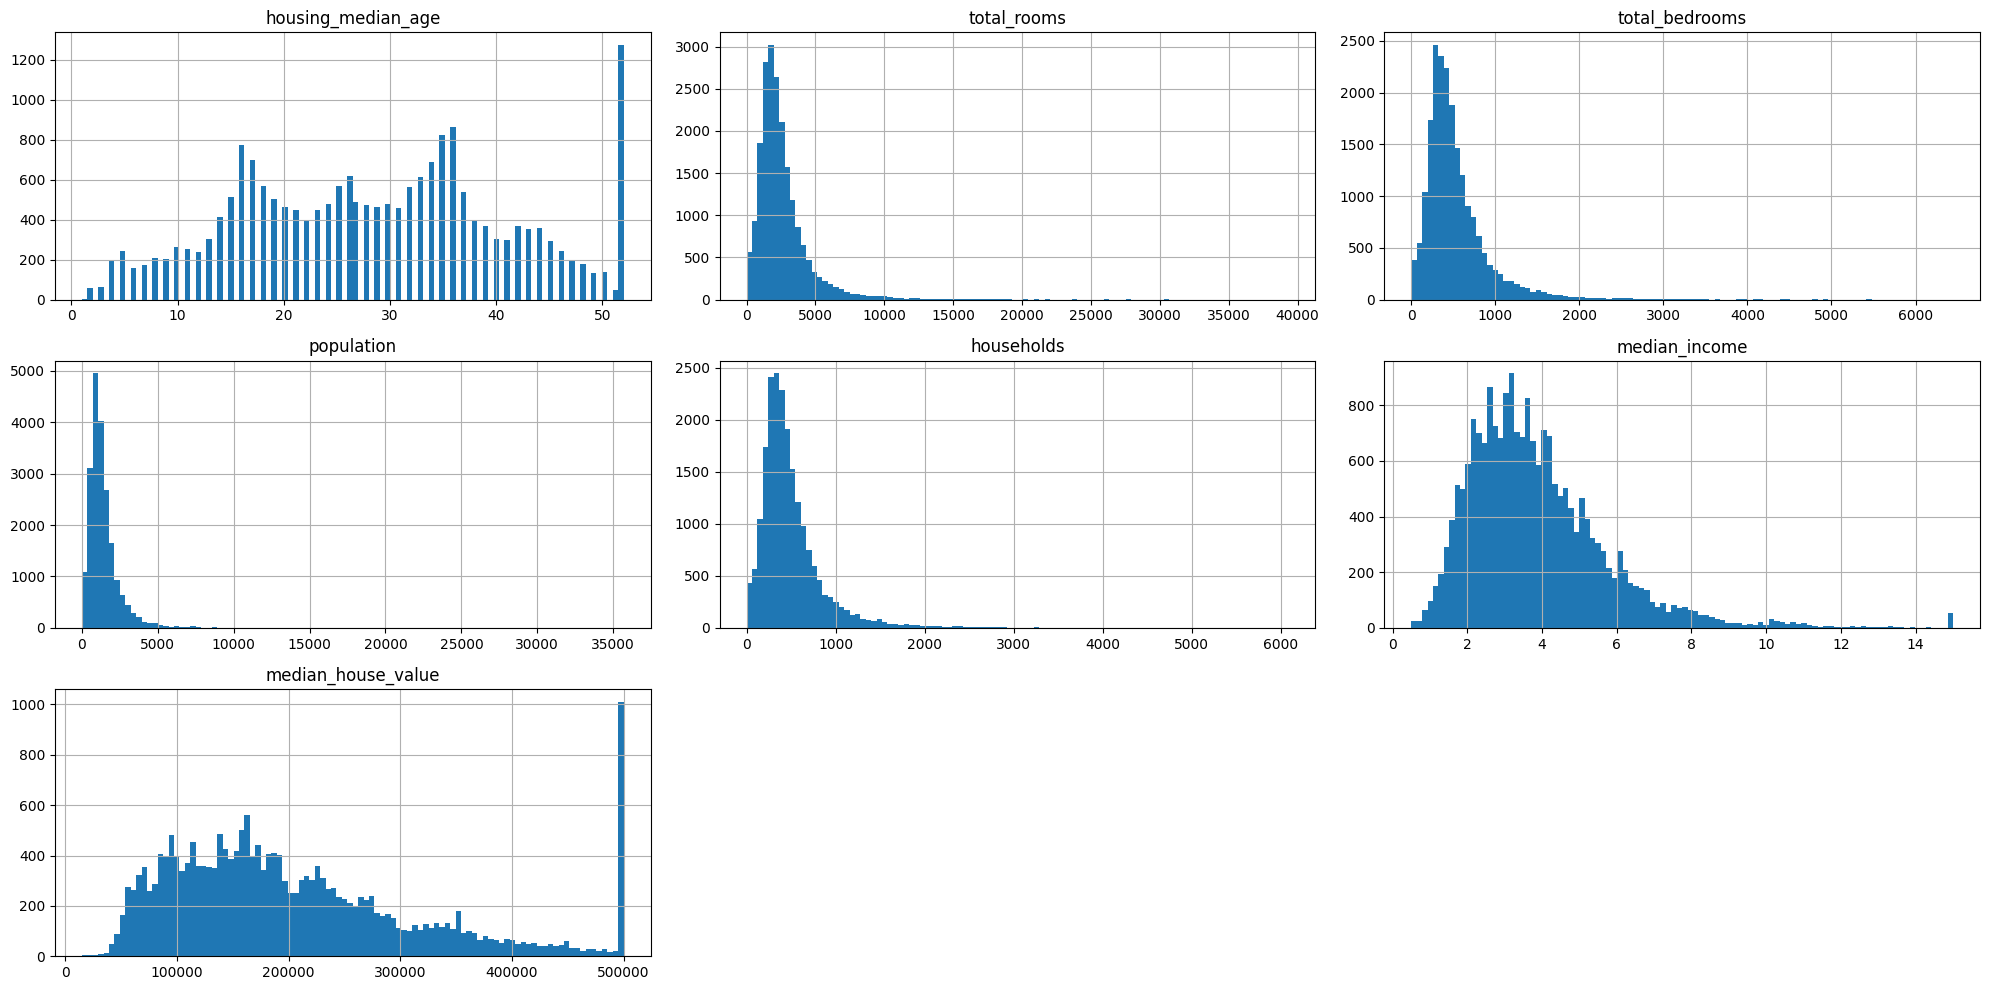

In [80]:
## Plot all the variables
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
housing_df.hist(bins=100, ax=ax, layout=(3, 3), column=['housing_median_age', 'total_rooms','total_bedrooms','population','households','median_income','median_house_value'])
plt.tight_layout()
plt.show()

### Ploting and looking at the median house value

<Axes: xlabel='median_house_value', ylabel='Count'>

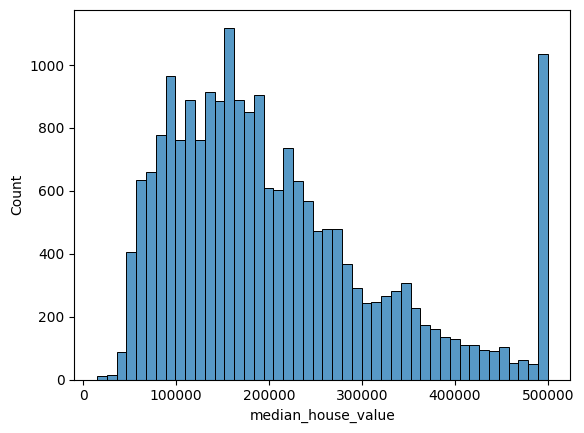

In [81]:

sns.histplot(housing_df.median_house_value)

/var/folders/js/95x7pm0d46d9qsgdhmvy56400000gn/T/ipykernel_67300/1535545280.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_df.median_house_value)


<Axes: xlabel='median_house_value', ylabel='Density'>

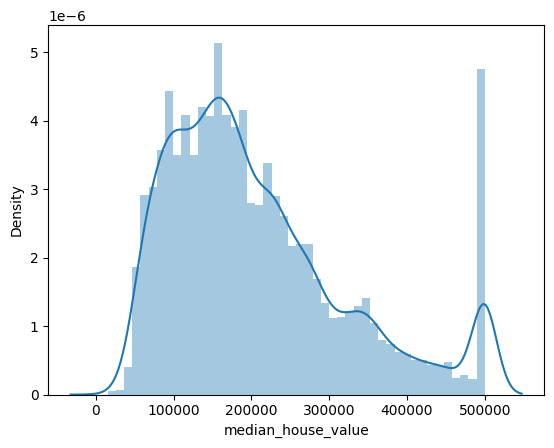

In [56]:
sns.distplot(housing_df.median_house_value)

### Prepare the data analysis
Select the required rows and columns for the machine learning to predict the house pri

In [82]:
## Subset the rows ans columns needed for the analysis
columns_needed = ['latitude','longitude','housing_median_age','total_rooms',
                    'total_bedrooms','population','households','median_income','median_house_value']
housing_df_subset = housing_df.loc[housing_df['ocean_proximity'].isin(["<1H OCEAN", "INLAND"])][columns_needed]

In [58]:
housing_df_subset

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [83]:
housing_df_subset.describe(percentiles=[.0, .25, .5, .75, .9, .95, .99, .1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
latitude,15687.0,35.467307,2.066387,32.6100,32.6100,33.750,33.9400,34.1600,37.3400,38.59000,39.12000,40.570000,41.9500
longitude,15687.0,-119.217442,1.780380,-124.1400,-124.1400,-121.900,-121.0700,-118.3700,-117.9900,-117.37000,-117.07000,-116.077200,-114.3100
housing_median_age,15687.0,27.188118,12.057128,1.0000,1.0000,11.000,17.0000,27.0000,36.0000,43.00000,48.00000,52.000000,52.0000
total_rooms,15687.0,2665.677312,2257.672743,2.0000,2.0000,937.000,1441.0000,2118.0000,3172.0000,4773.00000,6386.50000,11637.660000,39320.0000
total_bedrooms,15530.0,541.244688,435.650018,2.0000,2.0000,197.000,295.0000,432.0000,645.0000,976.00000,1300.00000,2292.710000,6445.0000
population,15687.0,1466.317205,1180.389908,3.0000,3.0000,519.000,802.0000,1195.0000,1777.0000,2654.40000,3426.70000,6015.080000,35682.0000
households,15687.0,500.916491,392.759399,2.0000,2.0000,182.600,278.0000,406.0000,602.0000,902.00000,1189.00000,2038.280000,6082.0000
median_income,15687.0,3.804019,1.857158,0.4999,0.4999,1.875,2.5208,3.4688,4.6862,6.08164,7.11438,10.358868,15.0001
median_house_value,15687.0,191943.020017,108801.077620,14999.0000,14999.0000,74800.000,111300.0000,166900.0000,241100.0000,347700.00000,440900.00000,500001.000000,500001.0000


### Question 1
There's one feature with missing values. What is it?

Ans: total_bedrooms with 157 missing values

In [84]:
## Columns with missing values
housing_df_subset.isna().sum()[housing_df_subset.isna().sum() > 0]

total_bedrooms    157
dtype: int64

### Question 2 
What's the median (50% percentile) for variable 'population'?

Ans: The median value for the populations is 1195

In [85]:
int(housing_df_subset.population.median())

1195

### Prepare and split the dataset

In [86]:
## Set random seeds for spliting the data
np.random.seed(42)
n = len(housing_df_subset)
idx = np.arange(n)
np.random.shuffle(idx)


In [87]:
n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - (n_test + n_val)

print(n, n_train + n_test + n_val, n_train, n_test, n_val)

15687 15687 9413 3137 3137


In [88]:
df_train = housing_df_subset.iloc[idx[:n_train]]
df_val = housing_df_subset.iloc[idx[n_train:n_train + n_val]]
df_test = housing_df_subset.iloc[idx[n_train + n_val:]]


In [89]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [90]:
y_train_original = df_train.median_house_value.values
y_test_orginal = df_test.median_house_value.values
y_val_original = df_val.median_house_value.values

y_train = np.log1p(y_train_original)
y_test = np.log1p(y_test_orginal)
y_val = np.log1p(y_val_original)

del df_train["median_house_value"]
del df_test["median_house_value"]
del df_val["median_house_value"]

### Question 3

### Filling the missing value

In [143]:
def prepare_X(df, fillna_value):
    df = df.copy()
    df = df.fillna(fillna_value)
    X = df.values
    return X


def rmse(y, y_pred):
    se = (( y - y_pred) ** 2).mean()
    return np.sqrt(se)
    
    
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]


#### Test mean first

In [144]:
total_bedrooms_mean = df_train.total_bedrooms.mean()

X_train = prepare_X(df_train, total_bedrooms_mean)


w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=total_bedrooms_mean)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)


0.3333238101457328

#### Test with zero

In [145]:
X_train = prepare_X(df_train, 0)


w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=0)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)


0.33415582665298454

### Question 4 Regularisation

In [146]:
def train_linear_regression(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX= XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [148]:
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
min_value = 100000
min_r = ''
for r in r_values:
    w_0, w = train_linear_regression(X_train, y_train, r=r)
    X_val = prepare_X(df_val, fillna_value=0)
    y_pred = w_0 + X_val.dot(w)

    rsme_value = rmse(y_val, y_pred)
    rsme_val_list.append(rsme_value)
    
    if rsme_value < min_value:
        min_value = rsme_value
        min_r = str(r)

    print("RSME value: {0:10} is {1}".format(r, rsme_value))


print("The best r value is: {0:5} with rsme of {1}".format(min_r, min_value))

RSME value:          0 is 0.33415582665298454
RSME value:      1e-06 is 0.3341558238025731
RSME value:     0.0001 is 0.33415554224275285
RSME value:      0.001 is 0.3341530188124614
RSME value:       0.01 is 0.33413123609128037
RSME value:        0.1 is 0.3341554915457138
RSME value:          1 is 0.33679181130790287
RSME value:          5 is 0.33934282802293203
RSME value:         10 is 0.33987999985514245
The best r value is: 0.01  with rsme of 0.33413123609128037


### Question 5

In [155]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

rsme_values = []
for seed in seed_values:
    np.random.seed(seed)
    n = len(housing_df_subset)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    n_test = int(n * 0.2)
    n_val = int(n * 0.2)
    n_train = n - (n_test + n_val)
    
    df_train = housing_df_subset.iloc[idx[:n_train]]
    df_val = housing_df_subset.iloc[idx[n_train:n_train + n_val]]
    df_test = housing_df_subset.iloc[idx[n_train + n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    
    y_train_original = df_train.median_house_value.values
    y_test_orginal = df_test.median_house_value.values
    y_val_original = df_val.median_house_value.values
    
    y_train = np.log1p(y_train_original)
    y_test = np.log1p(y_test_orginal)
    y_val = np.log1p(y_val_original)
    
    del df_train["median_house_value"]
    del df_test["median_house_value"]
    del df_val["median_house_value"]
    
    X_train = prepare_X(df_train, 0)
    
    
    w_0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val, fillna_value=0)
    y_pred = w_0 + X_val.dot(w)

    
    rsme_value = rmse(y_val, y_pred)
    rsme_values.append(rsme_value)
    print("RSME value for seed is {1}".format(seed, rsme_value))


print(round(np.std(rsme_values), 3))

RSME value for seed is 0.3377387160082512
RSME value for seed is 0.3377999353662671
RSME value for seed is 0.33842870067715325
RSME value for seed is 0.33200494683064413
RSME value for seed is 0.3394451862555799
RSME value for seed is 0.3433819705287994
RSME value for seed is 0.3385330211770828
RSME value for seed is 0.34687476972931436
RSME value for seed is 0.3512736865968845
RSME value for seed is 0.33415582665298454
0.005
